# Processing Example

File Import:   0%|          | 0/1 [00:00<?, ?it/s]

ERROR:pyridy.file:Execution failed on sql 'SELECT * from measurement_information_table': no such table: measurement_information_table


[WinError 10061] No connection could be made because the target machine actively refused it
[WinError 10061] No connection could be made because the target machine actively refused it


Bounding Boxes:   0%|          | 0/1 [00:00<?, ?it/s]

Railway Types:   0%|          | 0/1 [00:00<?, ?it/s]

Map Matching: Files in Campaign:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

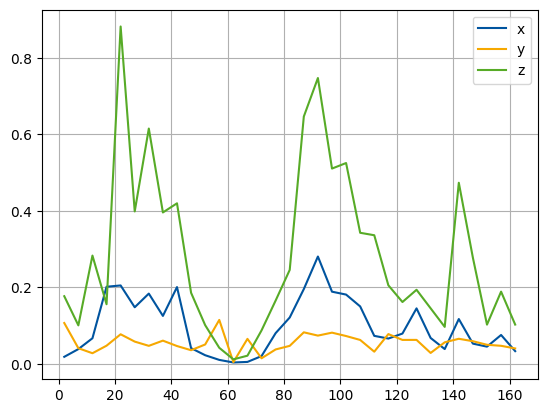

In [1]:
import pyridy
from matplotlib import pyplot as plt
from pyridy.processing import  ExcitationProcessor, ComfortProcessor
my_campaign = pyridy.Campaign()
my_campaign.import_folder("../../tests/files/sqlite/osm_mapping_test",download_osm_data=True,
                              railway_types=["tram"],
                              osm_recurse_type="<")

my_campaign.do_map_matching()

ExcitationProcessor(my_campaign).execute()

ComfortProcessor(my_campaign, v_thres=10/3.6).execute()

t = my_campaign.results[ComfortProcessor]['osm_mapping_test.sqlite']['t']
cc_x = my_campaign.results[ComfortProcessor]['osm_mapping_test.sqlite']['cc_x']
cc_y = my_campaign.results[ComfortProcessor]['osm_mapping_test.sqlite']['cc_y']
cc_z = my_campaign.results[ComfortProcessor]['osm_mapping_test.sqlite']['cc_z']
n_mv = my_campaign.results[ComfortProcessor]['osm_mapping_test.sqlite']['n_mv']

fig, ax = plt.subplots(1, 1)

ax.plot(t, cc_x, label='x')
ax.plot(t, cc_y, label='y')
ax.plot(t, cc_z, label='z')
ax.grid()
ax.legend()
plt.show()